## Consigna Original:

Certainly! Here's a nicely formatted Markdown for your project description:

---

# Linear Regression Health Costs Calculator

Welcome to the Linear Regression Health Costs Calculator project, designed to predict healthcare costs using a regression algorithm. This project will be completed using Google Colaboratory.

## Getting Started

1. **Clone the Notebook**: Visit [Google Colaboratory](https://colab.research.google.com/) and create a copy of the notebook either in your own Google account or locally on your machine.

2. **Project Requirements**: The notebook includes two initial cells that import necessary libraries and load the dataset.

3. **Project Tasks**:
   - Convert categorical data to numerical format.
   - Split the dataset: Use 80% for training (`train_dataset`) and 20% for testing (`test_dataset`).
   - Extract the `expenses` column from both datasets to create `train_labels` and `test_labels`.
   - Build and train a regression model using `train_dataset` and `train_labels`.
   - Ensure the model meets the evaluation criteria: Mean Absolute Error under 3500.
   - The final cell in the notebook evaluates the model's performance using `test_dataset` and graphs the results.

4. **Submission**:
   - Once the notebook passes the evaluation criteria, submit your project link. If it's a Google Colaboratory link, ensure link sharing is enabled for "anyone with the link".

5. **Learning Resources**:
   - Utilize video challenges provided in the certification.
   - Seek additional resources as needed, reflecting a real-world project approach.

Good luck with your project! Dive into the data, build an effective regression model, and predict healthcare costs accurately.

---

Feel free to adjust any details or add further specifics based on your project requirements.

# Calculadora de Costos de Salud con Regresión Lineal

Trabajarás en este proyecto con Google Colaboratory.

Después de ir a ese enlace, crea una copia del notebook en tu propia cuenta o localmente. Una vez que completes el proyecto y pase la prueba (incluida en ese enlace), envía el enlace de tu proyecto a continuación. Si envías un enlace de Google Colaboratory, asegúrate de activar el uso compartido de enlaces para "cualquiera con el enlace".

Todavía estamos desarrollando el contenido instructivo interactivo para el plan de estudios de aprendizaje automático. Por ahora, puedes pasar por los desafíos en video de esta certificación. También puede que tengas que buscar recursos adicionales de aprendizaje, similar a lo que harías al trabajar en un proyecto del mundo real.

## En este desafío, predecirás los costos de atención médica usando un algoritmo de regresión.

Se te da un conjunto de datos que contiene información sobre diferentes personas, incluyendo sus costos de atención médica. Utiliza los datos para predecir los costos de atención médica basados en nuevos datos.

Las dos primeras celdas de este notebook importan bibliotecas y los datos.

Asegúrate de convertir los datos categóricos a números. Usa el 80% de los datos como el train_dataset y el 20% de los datos como el test_dataset.

Saca la columna de "expenses" de estos conjuntos de datos para crear nuevos conjuntos de datos llamados train_labels y test_labels. Usa estas etiquetas al entrenar tu modelo.

Crea un modelo y entrénalo con el train_dataset. Ejecuta la última celda en este notebook para verificar tu modelo. La última celda usará el test_dataset no visto para verificar qué tan bien generaliza el modelo.

Para pasar el desafío, model.evaluate debe devolver un Error Absoluto Medio menor de 3500. Esto significa que predice los costos de atención médica correctamente dentro de $3500.

La última celda también predecirá los gastos usando el test_dataset y graficará los resultados.


----------



# Importamos librerias, y cargamos los datos

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()



  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
--2024-07-18 07:12:44--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.004s  

2024-07-18 07:12:44 (11.1 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


---------

# verificamos el dataframe

In [ ]:
dataset

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


# Importamos dependencias

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Cargar datos
data = dataset

# Ver las primeras filas del conjunto de datos
print(data.head())


   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


El código separa las características de la etiqueta en el conjunto de datos, luego divide los datos en conjuntos de entrenamiento y prueba. Identifica las columnas categóricas y numéricas para aplicar transformaciones adecuadas. Crea transformadores para normalizar los datos numéricos y codificar los categóricos, los combina en un preprocesador, y usa un pipeline para aplicar estos preprocesamientos a los datos de entrenamiento y prueba.

In [ ]:
# Seleccionar características (features) y etiqueta (label)
features = data.drop(columns=['expenses'])
labels = data['expenses']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Identificar columnas categóricas y numéricas
categorical_features = features.select_dtypes(include=['object']).columns
numerical_features = features.select_dtypes(exclude=['object']).columns

# Crear transformaciones
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crear pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocesar los datos
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)


El código define un modelo secuencial de Keras con varias capas densas y una capa de dropout para prevenir el sobreajuste. Usa activación 'relu' en las capas densas y regularización L2 para controlar la complejidad del modelo. El modelo se compila con el optimizador 'adam' y la pérdida de error cuadrático medio. Luego, se entrena con un tamaño de lote de 10 y 100 épocas, reservando el 20% de los datos para validación.

In [ ]:
# # Definir el modelo
# model = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1)
# ])

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.015)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.23),  # Capa Dropout con una tasa de dropout del 23%
    tf.keras.layers.Dense(1)
])
# model.compile(optimizer='adam', loss='mean_absolute_error')
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse'])

# segun la teoria: un tamaño de lote pequeño generaliza mejor en los datos # con 35 no mejoro generalizacion # le baje  a 20 de batchsize y mejoro la generalizacion # achique a 10 y mejoro la generalizacion
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size = 10,validation_split=0.2, verbose=1)


Epoch 1/100
86/86 [==============================] - 2s 7ms/step - loss: 324766816.0000 - mae: 13490.9814 - mse: 324766816.0000 - val_loss: 306619360.0000 - val_mae: 12513.1543 - val_mse: 306619360.0000
Epoch 2/100
86/86 [==============================] - 0s 5ms/step - loss: 290652128.0000 - mae: 12208.4648 - mse: 290652096.0000 - val_loss: 218628400.0000 - val_mae: 9043.6084 - val_mse: 218628400.0000
Epoch 3/100
86/86 [==============================] - 0s 6ms/step - loss: 158548416.0000 - mae: 8301.8105 - mse: 158548416.0000 - val_loss: 120159240.0000 - val_mae: 8398.0498 - val_mse: 120159240.0000
Epoch 4/100
86/86 [==============================] - 1s 6ms/step - loss: 108795944.0000 - mae: 8102.5840 - mse: 108795920.0000 - val_loss: 97769928.0000 - val_mae: 7985.4399 - val_mse: 97769928.0000
Epoch 5/100
86/86 [==============================] - 0s 5ms/step - loss: 87739912.0000 - mae: 7510.1499 - mse: 87739896.0000 - val_loss: 77716272.0000 - val_mae: 6670.4189 - val_mse: 77716256.000

El código evalúa el modelo en el conjunto de prueba, imprime el error absoluto medio. Luego, realiza predicciones con el modelo sobre los datos de prueba y grafica estas predicciones frente a los valores reales para visualizar la precisión del modelo.

9/9 [==============================] - 0s 3ms/step - loss: 20017616.0000 - mae: 2588.0925 - mse: 20017594.0000
Mean Absolute Error on test dataset: [20017616.0, 2588.092529296875, 20017594.0]
9/9 [==============================] - 0s 2ms/step


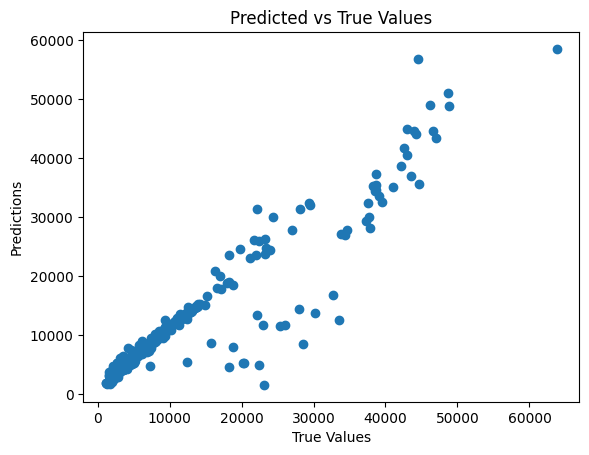

In [ ]:
# Evaluar el modelo
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Absolute Error on test dataset: {test_loss}')

# Hacer predicciones
predictions = model.predict(X_test)

# Graficar los resultados
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs True Values')
plt.show()


Este código evalúa el modelo en el conjunto de prueba y muestra el error absoluto medio. Luego, verifica si el error es menor a 3500 para determinar si el modelo ha pasado la prueba. También grafica las predicciones frente a los valores reales para visualizar la precisión del modelo, asegurándose de que las predicciones se alineen con los valores verdaderos.

----------------



9/9 - 0s - loss: 20017616.0000 - mae: 2588.0925 - mse: 20017594.0000 - 64ms/epoch - 7ms/step
Testing set Mean Abs Error: 2588.09 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 9ms/step


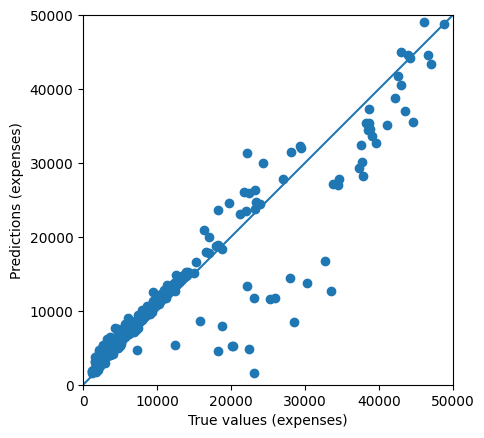

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(X_test).flatten()
predictions = model.predict(X_test)


a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
# para evaluar la precicion del modelo supervisado queremos observar que y = X
